In [1]:
%matplotlib notebook
import numpy as np
from scipy import fftpack
from scipy.special import diric
import matplotlib.pyplot as plt

Posmatramo diskretni signal
$$x(n) = \cos \omega_0 n$$
za $\omega_0 = \frac{\pi}{5}$. Generisaćemo $L = 16$ odmjeraka ovog signala.

In [2]:
L = 16
w0 = np.pi/5

n = np.arange(L)
x = np.cos(w0*n)

Nacrtaćemo signal:

<IPython.core.display.Javascript object>


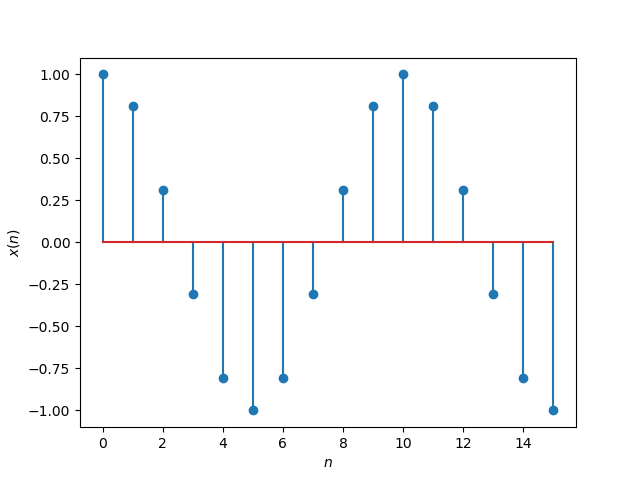

Text(0, 0.5, '$x(n)$')

In [3]:
plt.figure()
plt.stem(n, x)
plt.xlabel('$n$')
plt.ylabel('$x(n)$')

Izračunaćemo DFT signala u $N = 16$ tačaka.

In [4]:
N = 16
X = fftpack.fft(x, N)

Nacrtaćemo odmjerke DFT. Na apscisi ćemo označiti digitalnu frekvenciju. Odmjerci DFT se nalaze na frekvencijama oblika $\omega_k = \frac{2 \pi}{N} k$, za $k = 0, 1, \ldots, N-1$. Generisaćemo niz u kojem se nalaze vrijednosti frekvencija izračunate datim jednačinama.

Radi preglednosti ćemo vrijednosti na apscisi normalizovati sa $\pi$.

<IPython.core.display.Javascript object>


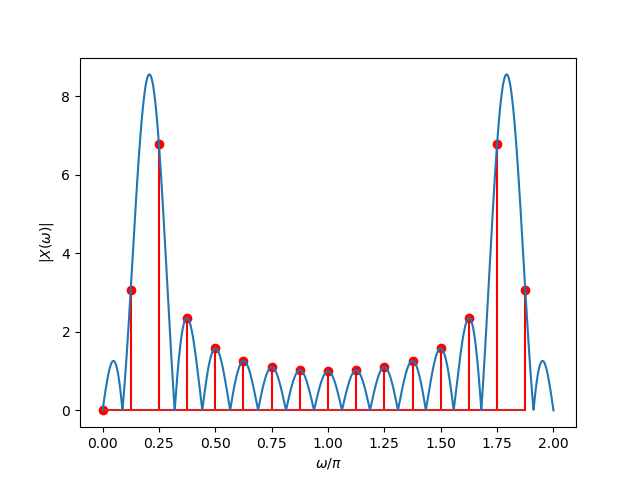

Text(0, 0.5, '$|X(\\omega)|$')

In [5]:
k = np.arange(N)
wk = 2*np.pi*k/N

plt.figure()
plt.stem(wk/np.pi, np.abs(X), 'r', markerfmt='ro')
plt.xlabel(r'$\omega/\pi$')
plt.ylabel(r'$|X(\omega)|$')

Koeficijenti DFT uzorka sinusoide konačnog trajanja su, u stvari, odmjerci DTFT signala
$$\hat{x}(n) = x(n) p_L(n),$$
gdje je $p_L(n)$ pravougaona prozorska funkcija. 

DTFT signala $\hat{x}(n)$ je
$$\hat{X} \left( e^{j \omega} \right) = \frac{1}{2} \left[ P_L \left( e^{j \left(\omega-\omega_0 \right)} \right) + P_L \left( e^{j \left( \omega+\omega_0 \right) } \right) \right],$$
gdje je
$$P_L \left( e^{j \omega} \right) = \frac{\sin \frac{\omega L}{2}}{\sin \frac{\omega}{2}} e^{-j \frac{L-1}{2} \omega}.$$

In [6]:
w = np.linspace(0, 2*np.pi, 1001)
Xdtft = 0.5*L*diric(w-w0, L)*np.exp(-1j*(w-w0)*(L-1)/2) + 0.5*L*diric(w+w0, L)*np.exp(-1j*(w+w0)*(L-1)/2)
plt.plot(w/np.pi, np.abs(Xdtft))

Frekvencija $\omega_0$ nije jednaka ni jednoj od frekvencija na kojima se računa DFT pa su za reprezentaciju signala $x(n)$ potrebne sve bazne funkcije za $N=16$. Ova pojava se naziva _curenje spektra_.

Analiza u frekvencijskom domenu nam daje bolji uvid u ovu pojavu. Računanjem DFT signala $\hat{x}(n)$ konačnog trajanja je ekvivalentno odmjeravanju u frekvenciji njegovog spektra. Pošto je signal $\hat{x}(n)$ jednak proizvodu pravougaone prozorske funkcije $p_L(n)$ i sinusoide frekvencije $\omega_0$ onda je njegov spektar jednak zbiru spektara pravougaone prozorske funkcije pomjerenih u $\omega=\omega_0$ i $\omega=-\omega_0$.

Tačnost estimacije frekvencije sinusoide zavisi od odstupanja tačne frekvencije od frekvencija odmjeraka DFT $\omega_k$.

In [7]:
idx = np.argmax(np.abs(X))
print('Estimirana frekvencija sinusoide je: {:0.4f}$\pi$.'.format(wk[idx]/np.pi))

Estimirana frekvencija sinusoide je: 0.2500$\pi$.


Bolju predstavu o izgledu spektra možemo dobiti gušćim odmjeravanjem DTFT uz dopunjavanje nulama. Probajmo sa odmjeravanjem u $N=128$ tačaka

In [ ]:
N = 128
X = fftpack.fft(x, N)

k = np.arange(N)
wk = 2*np.pi*k/N

plt.figure()
plt.stem(wk/np.pi, np.abs(X), 'r')
plt.plot(w/np.pi, np.abs(Xdtft))
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|X(\omega)$|')

U stvari, ako odmjeravamo u velikom broju tačaka, crtanjem pomoću `plot` možemo dobiti pristojnu aproksimaciju spektra. Dalje povećanje broja tačaka bi dodatno poboljšalo aproksimaciju. Razlog za ovo je što se interplaciona funkcija $P_L \left( e^{j \omega} \right)$ za male vrijednosti $\omega$ može aproksimirati linearnom funkcijom.

In [ ]:
plt.figure()
plt.plot(wk/np.pi, np.abs(X))
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|X(\omega)$|')

Zbog gušćeg odmjeravanja i tačnost estimacije frekvencije je bolja:

In [ ]:
idx = np.argmax(np.abs(X))
print('Estimirana frekvencija sinusoide je: {:0.4f}$\pi$.'.format(wk[idx]/np.pi))

Dopunjavanje nulama pomaže da se dobije bolja predstava o izgledu spektra. Međutim, možemo primjetiti da dopunjavanje nulama ne pomaže da se ublaže efekti curenja spektra. Curenje spektra je, jednostavno, posljedica posmatranja uzorka signala konačnog trajanja.

Da bismo dobili dodatni uvid u curenje spektra posmatrajmo periodično proširenje signala $x(n)$. Kao što znamo, DFT implicitno smatra da je signal periodičan sa periodom jednakim dužini uzorka signala (u našem slučaju $L$).

In [ ]:
xper = np.concatenate((x, x, x))
nn = np.arange(-L, 2*L)

plt.figure()
plt.stem(nn, xper)
plt.xlabel('$n$')
plt.ylabel('$\tilde{x}^L(n)$')

Vidimo da ovaj signal nije prostoperiodičan već da na početku svakog novog perioda signal skokovito mijenja vrijednost. Ta skokovita promjena unosi visokofrekventni sadržaj u spektar signala.

U nekim situacijama se curenje spektra neće pojaviti. Posmatrajmo slučaj kada je frekvencija sinusoide jednaka $\omega_0 = \frac{\pi}{8}$ i dužina uzorka $L = 32$.

In [ ]:
L = 32
w0 = np.pi/8

n = np.arange(L)
x = np.cos(w0*n)

In [ ]:
N = 32
X = fftpack.fft(x, N)

k = np.arange(N)
wk = 2*np.pi*k/N

plt.figure()
plt.stem(wk/np.pi, np.abs(X), 'r', markerfmt='ro')
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|X(\omega)|$')

In [ ]:
w = np.linspace(0, 2*np.pi, 1001)
Xdtft = 0.5*L*diric(w-w0, L)*np.exp(-1j*(L-1)*(w-w0)/2) + 0.5*L*diric(w+w0, L)*np.exp(-1j*(L-1)*(w+w0)/2)

plt.plot(w/np.pi, np.abs(Xdtft))

Curenje spektra se nije pojavilo zato što je signal prostoperiodičan, dužina uzorka je jednaka cjelobrojnom umnošku perioda signala i ne koristi se dopunjavanje nulama.

Pogledajmo periodično proširenje u ovom slučaju

In [ ]:
xper = np.concatenate((x, x, x))
nn = np.arange(-L, 2*L)

plt.figure()
plt.stem(nn, xper)
plt.xlabel('$n$')
plt.ylabel('$\tilde{x}^L(n)$')

Periodično proširen signal je prostoperiodičan sa frekvencijom $\omega_0 = \frac{\pi}{8}$.

Međutim, dopunjavanje nulama bi ponovo rezultovalo curenjem spektra.

In [ ]:
N = 256
X = fftpack.fft(x, N)

k = np.arange(N)
wk = 2*np.pi*k/N

plt.figure()
plt.plot(wk/np.pi, np.abs(X))
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|X(\omega)|$')

Međutim, pošto je frekvencija signala koji analiziramo upravo veličina koju nastojimo da odredimo spektralnom analizom signala, u praktičnim situacijama je nemoguće izabrati dužinu uzorka i broj tačaka DFT tako da se izbjegne curenje spektra, a dopunjavanje nulama može biti korisno za dobijanje bolje aproksimacije spektra ukoliko je uzorak signala kratak.

Curenje spektra se ogleda u pojavi bočnih lukova u spektru rezultujućeg signala. Bočni lukovi u spektru rezultujućeg signala su posljedica postojanja bočnih lukova prozorske funkcije. Pravougaona prozorska funkcija ima izražene bočne lukove.

In [ ]:
from scipy.signal import windows

L = 16
wrec = windows.boxcar(L)
N = 512
Wrec = fftpack.fft(wrec, N)
k = np.arange(N)
wk = 2*np.pi*k/N

plt.figure()
plt.plot(wk/np.pi, np.abs(Wrec))
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|W(\omega)|$')

U decibelima

In [ ]:
plt.figure()
plt.plot(wk/np.pi, 20*np.log10(np.abs(Wrec)/np.abs(Wrec[0])))
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|A(\omega)| [dB]$')

Slabljenje bočnih lukova je oko 13 dB.

Kada smo govorili o metodi prozorskih funkcija za projektovanje FIR filtara pomenuli smo da druge prozorske funkcije imaju manje izražene bočne lukove.

Na primjer, Hanova prozorska funkcija je obllika
$$w(n) = \left\{ \begin{array}{ll}
\frac{1}{2}\left(1 - \cos \frac{2 \pi}{L-1} n \right), & 0 \leq n \leq L-1 \\
0, & \text{inače}
\end{array} \right.$$

In [ ]:
whann = windows.hann(L)
n = np.arange(L)

plt.figure()
plt.stem(n, whann)
plt.xlabel('$n$')

In [ ]:
Whann = fftpack.fft(whann, N)

plt.figure()
plt.plot(wk, 20*np.log10(np.abs(Whann)/np.abs(Whann[0])))
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|A(\omega)|$')

Vidimo da je kod Hanove prozorske funkcije slabljenje bočnog luka 31 dB.

Primijenićemo Hanovu prozorsku funkciju na signal sa početka. FFT računamo uz dopunjavanje nulama i crtamo pomoću `plot`.

In [ ]:
L = 16
w0 = np.pi/5

n = np.arange(L)
x = np.cos(w0*n) * windows.hann(L)

N = 128
X = fftpack.fft(x, N)

k = np.arange(N)
wk = 2*np.pi*k/N

plt.figure()
plt.plot(wk/np.pi, np.abs(X))
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|X(\omega)|$')

Vidimo da su sada bočni lukovi, a time i curenje spektra znatno manje izraženi.

Posmatrajmo sada složeni signal
$$x(n) = \cos \omega_1 n + \cos \omega_2 n.$$
Neka su $\omega_1 = 0,2 \pi$ i $\omega_2 = 0,22 \pi$. Generisaćemo $L=32$ odmjerka signala i računaćemo DFT u $N=512$ tačaka.

In [ ]:
L = 32
w1 = 0.2*np.pi
w2 = 0.22*np.pi

n = np.arange(L)
x = np.cos(w1*n) + np.cos(w2*n)

N = 512
X = fftpack.fft(x, N)

k = np.arange(N)
wk = 2*np.pi*k/N

plt.figure()
plt.plot(wk/np.pi, np.abs(X))
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|X(\omega)|$')

U rezultujućem spektru ne vidimo doprinos obje sinusoide. Šta se desilo?

Nacrtaćemo pojedinačno DFT svake komponente na istom grafiku.

In [ ]:
L = 32
w1 = 0.2*np.pi
w2 = 0.22*np.pi

n = np.arange(L)
x1 = np.cos(w1*n) 
x2 = np.cos(w2*n)

N = 512
X1 = fftpack.fft(x1, N)
X2 = fftpack.fft(x2, N)

k = np.arange(N)
wk = 2*np.pi*k/N

plt.figure()
plt.plot(wk/np.pi, np.abs(X1), 'b')
plt.plot(wk/np.pi, np.abs(X2), 'r')
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|X(\omega)|$')

Spektar signala konačnog trajanja je
$$\hat{x} = \frac{1}{2} \left[ P_L \left( e^{j \left(\omega-\omega_1 \right)} \right) + P_L \left( e^{j \left(\omega-\omega_2 \right)} \right) + P_L \left( e^{j \left( \omega+\omega_1 \right) } \right) + P_L \left( e^{j \left( \omega+\omega_2 \right) } \right) \right].$$

Pošto je razlika između frekvencija $\omega_1$ i $\omega_2$ manja od širine glavnog luka prozorske funkcije, nije moguće razlikovati pojedine glavne lukove u spektru signala konačnog trajanja, odnosno, nije moguće razlikovati pojedine sinusoide u originalnom signalu.

_Spektralna rezolucija_ je najmanja razlika između frekvencija sinusoida koje je moguće razlikovati u spektru signala. Korištenje signala konačnog trajanja ograničava spektralnu rezoluciju analizatora spektra.

Prva nula spektra pravougaone prozorske funkcije je u $\omega=\frac{2 \pi}{L}$. Da bismo mogli da razlikujemo glavne lukove treba da bude
$$\vert \omega_1 - \omega_2 \vert \geq \frac{2 \pi}{L}.$$

U našem slučaju je $\vert \omega_1 - \omega_2 \vert = 0,02$ pa nam treba $L \geq 100$. Dakle, za poboljšanje spektralne rezolucije potreban nam je duži uzorak signala. Dopunjavanje nulama ovdje nema efekta zato što ne donosi nove informacije o spektru signala.

In [ ]:
L = 128
w1 = 0.2*np.pi
w2 = 0.22*np.pi

n = np.arange(L)
x = np.cos(w1*n) + np.cos(w2*n)

N = 512
X = fftpack.fft(x, N)

k = np.arange(N)
wk = 2*np.pi*k/N

plt.figure()
plt.plot(wk/np.pi, np.abs(X))
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|X(\omega)|$')

Druge prozorske funkcije imaju širi glavni luka pa je da bi se postigla ista rezolucija potrebno koristiti duže uzorke signala.

In [ ]:
L = 32
w1 = 0.2*np.pi
w2 = 0.22*np.pi

n = np.arange(L)
x = np.cos(w1*n) + np.cos(w2*n)
x = x*windows.hann(L)

N = 512
X = fftpack.fft(x, N)

k = np.arange(N)
wk = 2*np.pi*k/N

plt.figure()
plt.plot(wk/np.pi, np.abs(X))
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|X(\omega)|$')

In [ ]:
L = 128
w1 = 0.2*np.pi
w2 = 0.22*np.pi

n = np.arange(L)
x = np.cos(w1*n) + np.cos(w2*n)
x = x*windows.hann(L)

N = 512
X = fftpack.fft(x, N)

k = np.arange(N)
wk = 2*np.pi*k/N

plt.figure()
plt.plot(wk/np.pi, np.abs(X))
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|X(\omega)|$')

In [ ]:
L = 256
w1 = 0.2*np.pi
w2 = 0.22*np.pi

n = np.arange(L)
x = np.cos(w1*n) + np.cos(w2*n)
x = x*windows.hann(L)

N = 512
X = fftpack.fft(x, N)

k = np.arange(N)
wk = 2*np.pi*k/N

plt.figure()
plt.plot(wk/np.pi, np.abs(X))
plt.xlabel('$\omega/\pi$')
plt.ylabel('$|X(\omega)|$')

## Primjeri spektralne analize signala

Iskorisitćemo DFT za spektralnu analizu analognih signala. Zbog diskretizacije signala informacije o spektru analognog signala možemo dobiti samo u intervalu $-\frac{F_s}{2} \leq F \leq \frac{F_s}{2}$.

Prvi primjer je ton C4 čija je frekvencija $F_0 = 261,626$ Hz.

In [ ]:
F0 = 261.626
Fs = 8000
T = 0.05

t = np.arange(0, T, 1.0/Fs)
x = np.cos(2*np.pi*F0*t)

plt.figure()
plt.plot(t, x)
plt.xlabel('t[s]')
plt.ylabel('x(t)')

Broj tačaka u kojima računamo DFT je prvi stepen broja 2 veći od trajanja uzorka signala. Razlozi za ovakav izbor su uslov da se izbjegne preklapanje u vremenskom domenu iz kojeg slijedi da broj tačaka DFT mora biti veći ili jednak od dužine uzorka i postojanje efikasnih algoritama za računanje DFT kada je broj tačaka stepen broja 2.

Odmjerci spektra su u frekvencijama
$$F_k = \frac{k F_s}{N}, \; k = 0, 1, \ldots, N-1.$$

In [ ]:
N = np.int(2**(np.ceil(np.log2(len(x)))))

X = fftpack.fft(x, N)
k = np.arange(N)
F = k*Fs/N

plt.figure()
plt.plot(F, np.abs(X))
plt.xlabel('$F$[Hz]')
plt.ylabel('$|X(F)|$')

U spektralnoj analizi analognog signala dio spektra u intervalu $\frac{F_s}{2} \leq F \leq F_s$ nema fizički smisao pa se spektar najčešće crta u intervalu $-\frac{F_s}{2} \leq F \leq \frac{F_s}{2}$. Zahvaljujući periodičnosti DTFT, funkcija `fftshift` preuređuje vektor koeficijenata DFT tako da odgovaraju ovom opsegu frekvencija. Potrebno je još generisati vrijednosti frekvencija u kojima se nalaze odmjerci.

In [ ]:
X = fftpack.fftshift(X)/N
k = np.arange(-N/2, N/2, dtype=int)
F = k*Fs/N

plt.figure()
plt.plot(F, np.abs(X))
plt.xlabel('$F$[Hz]')
plt.ylabel('$|X(F)|$')

Ponovićemo isti postupak sa složenoperiodičnim signalom
$$x(t) = \cos 2 \pi F_0 t + \cos 2 \pi 2 F_0 t + \cos 2 \pi 4 F_0 t.$$

In [ ]:
F0 = 261.626
Fs = 8000
T = 0.05

t = np.arange(0, T, 1.0/Fs)
x = np.cos(2*np.pi*F0*t) + 0.5*np.cos(2*np.pi*2*F0*t) + 0.25*np.cos(2*np.pi*4*F0*t)

plt.figure()
plt.plot(t, x)
plt.xlabel('t[s]')
plt.ylabel('x(t)')

In [ ]:
N = np.int(2**(np.ceil(np.log2(len(x)))))
X = fftpack.fft(x, N)/N
X = fftpack.fftshift(X)
k = np.arange(-N/2, N/2, dtype=int)
F = k*Fs/N

plt.figure()
plt.plot(F, np.abs(X))
plt.xlabel('$F$[Hz]')
plt.ylabel('$|X(F)|$')

Analizirajmo sada ton C4 odsviran na klaviru.

In [ ]:
from scipy.io import wavfile
from IPython.display import Audio

Fs, x = wavfile.read('piano-C4.wav')
x = x / np.max(np.abs(x))

Audio(x, rate=Fs)

In [ ]:
N = len(x)

X = fftpack.fft(x)/N
X = fftpack.fftshift(X)
k = np.arange(-N/2, N/2, dtype=int)
F = k*Fs/N

plt.figure()
plt.plot(F, np.abs(X))
plt.xlabel('$F$[Hz]')
plt.ylabel('$|X(F)|$')

Frekvencija odmjeravanja u ovom slučaju je 11025 Hz. Spektar je normalizovan tako da je njegova najveća vrijednost jednaka jedinici. Izraženi impulsi na približno jednakim razmacima na frekvencijskoj osi ukazuju na približno diskretnu prirodu ovog spektra, odnosno, na približnu periodičnost signala. To je zaista tačno, jer je ton na klaviru proizveden vibriranjem žice. Razmak između impulsa jednak je osnovnoj frekvenciji ovog tona, a prisustvo viših harmonika i njihovi relativni odnosi određuju njegovu boju. U ovom slučaju detektovana osnovna frekvencija
je $F_0 = 261,635$ Hz što je blizu frekvencije tona C4 od 261,626 Hz. Sa slike je primjetno i curenje spektra. Međutim, zahvaljujući velikom broju tačaka u kojima je izracunata DFT (jednak
trajanju signala u odmjercima), impulsi su vrlo uski, a zahvaljujući dobrom odnosu signal-šum, lako ih je detektovati, tako da curenje spektra u ovom slučaju ne predstavlja znacajan problem.

Na kraju, pogledajmo i spektar govornog signala, konkretno, vokala /a/.

In [ ]:
Fs, x = wavfile.read('sat.wav')
x = x - np.mean(x)
x = x / np.max(np.abs(x))

Audio(x, rate=Fs)

In [ ]:
t = np.arange(len(x))/Fs
plt.figure()
plt.plot(t, x)
plt.xlabel('t[s]')
plt.ylabel('x(t)')

Izdvojićemo dio signala dužine 512 odmjeraka koji odgovara vokalu /a/, izračunati DFT u 2048 tačaka i nacrtati njegov spektar.

In [ ]:
y = x[6000:6512]

N = 2048
Y = fftpack.fft(y, N)/N
Y = fftpack.fftshift(Y)
k = np.arange(-N/2, N/2, dtype=int)
F = k*Fs/N

plt.figure()
plt.plot(F, np.abs(Y))
plt.xlabel('F[Hz]')
plt.ylabel('|X(F)|')

Zbog izraženog curenja spektra, bolji rezultati se dobijaju korištenjem Hemingove prozorske funkcije.

In [ ]:
y = y * windows.hamming(len(y))
Y = fftpack.fft(y, N)/N
Y = fftpack.fftshift(Y)
k = np.arange(-N/2, N/2, dtype=int)
F = k*Fs/N

plt.figure()
plt.plot(F, np.abs(Y))
plt.xlabel('F[Hz]')
plt.ylabel('|X(F)|')

Ponovo vidimo približno linijsku strukturu spektra što ukazuje na približno periodičan signal. Zaista, vokal /a/ nastaje strujanjem vazduha preko glasnih žica što uzrokuje njihovo treperenje pa je rezultujući signal približno periodičan.

Pogledajmo sada spektar uzorka signala trajanja 64 odmjerka.

In [ ]:
y = x[6000:6064]
y = y * windows.hamming(len(y))

N = 2048
Y = fftpack.fft(y, N)/N
Y = fftpack.fftshift(Y)
k = np.arange(-N/2, N/2, dtype=int)
F = k*Fs/N

plt.figure()
plt.plot(F, np.abs(Y))
plt.xlabel('F[Hz]')
plt.ylabel('|X(F)|')

Linijska struktura spektra se više ne vidi, ali primjetni su lokalni maksimumi. Ovi lokalni maksimumi predstavljaju _formante_ glasa /a/ i to su frekvencijski opsezi sa visokom energijom signala. Na formantnim frekvencijama dolazi do pojave rezonancije u govornom traktu. Formanti su značajni u kodovanju, sintezi i prepoznavanju govora.